# CS584 Machine Learning
# Team Members:
Vishwa Babariya - A20516499

Shraddha Kadiya - A20520127 

Bhaktiben Kadiya - A20518731

# Dataset: 
	Breast Cancer Wisconsin (Diagnostic) Data Set



# Objective: 
	To predict whether breast cancer is benign or malignant



# Context: 
	Early detection is crucial for effective treatment and improved outcomes in breast cancer



# Model Building

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('final_data.csv')
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
prediction_feature = [ 'radius_mean',  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [4]:
X = data[prediction_feature]
X

# print(X.shape)
# print(X.values)

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [5]:
y = data.diagnosis
y

# print(y.values)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)
# print(X_test)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

In [7]:
# Scale the data to keep all the values in the same magnitude of 0-1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    

In [9]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()  # Add the Gradient Boosting classifier
}

# print(models_list)

In [10]:
print(list(models_list.keys()))
print(list(models_list.values()))

# print(zip(list(models_list.keys()), list(models_list.values())))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier', 'GradientBoostingClassifier']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC(), KNeighborsClassifier(), GradientBoostingClassifier()]


# Model Evaluation

In [11]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
        



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           B       0.90      0.96      0.93       115
           M       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           B       0.92      0.96      0.94       115
           M       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           B       0.90      0.96      0.93       115
           M       0.92      0.84      0.88        73

    accuracy            

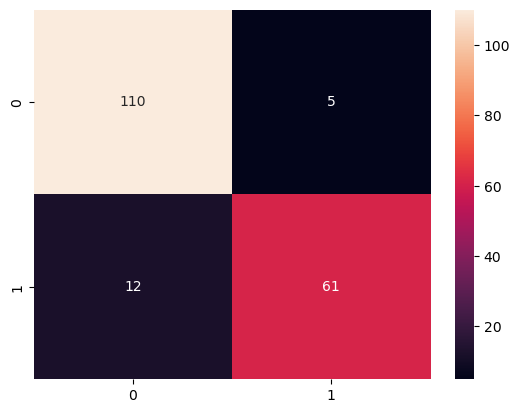


Confusion Matrix for 'RandomForestClassifier'



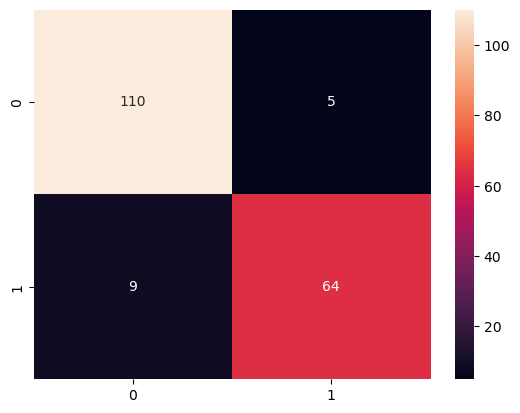


Confusion Matrix for 'DecisionTreeClassifier'



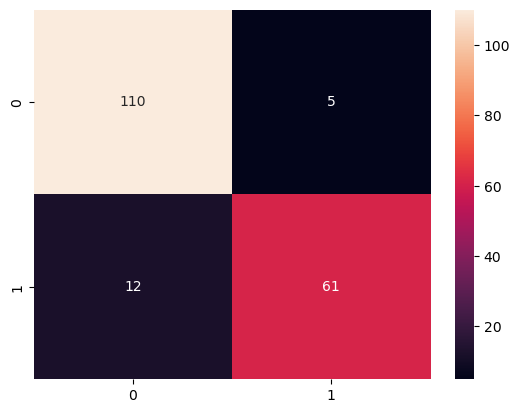


Confusion Matrix for 'SVC'



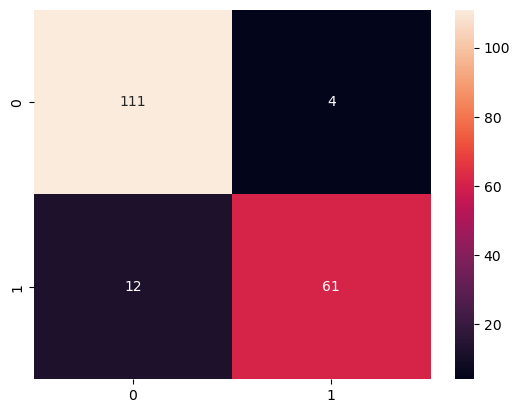


Confusion Matrix for 'KNeighborsClassifier'



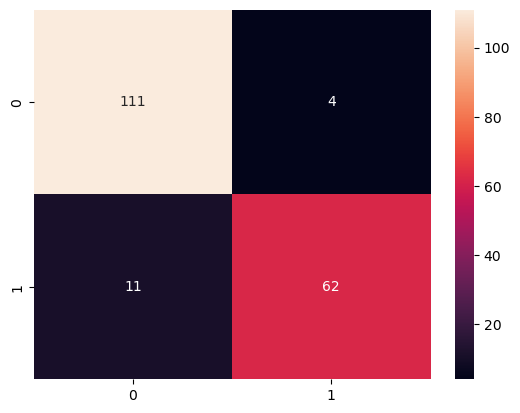


Confusion Matrix for 'GradientBoostingClassifier'



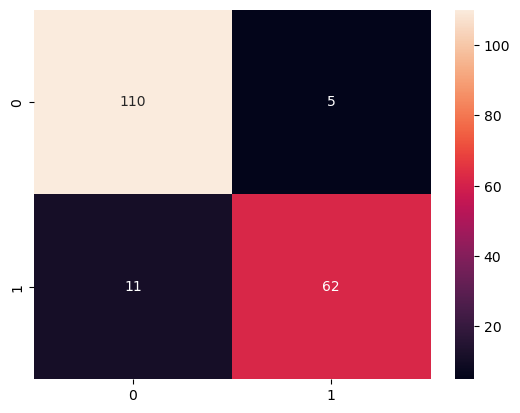

In [12]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):

    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )

    print("\n\nClassification Report of '"+ str(name), "'\n")

    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
for name, cm in zip(models_list.keys(), confusion_matrixs):
    print(f"\nConfusion Matrix for '{name}'\n")
    cm_metrix_graph(cm)


# Feature Selection

(569, 31) (569, 30) (569,)


Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       115
           M       1.00      0.92      0.96        73

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           B       0.91      1.00      0.95       115
           M       1.00      0.85      0.92        73

    accuracy                           0.94       188
   macro avg       0.96      0.92      0.94       188
weighted avg       0.95      0.94      0.94       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       115
           M       0.94      0.89      0.92        7

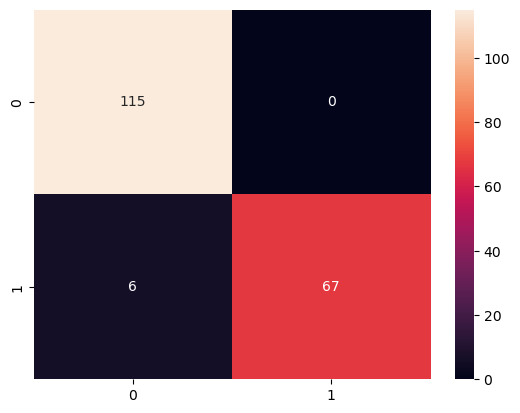


Confusion Matrix for 'RandomForestClassifier'



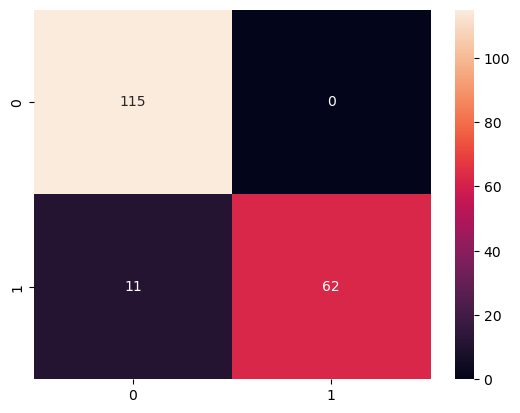


Confusion Matrix for 'DecisionTreeClassifier'



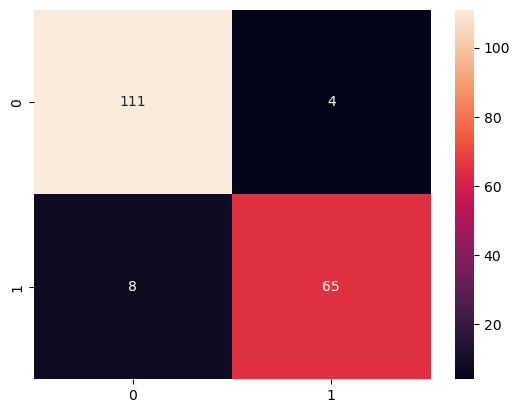


Confusion Matrix for 'SVC'



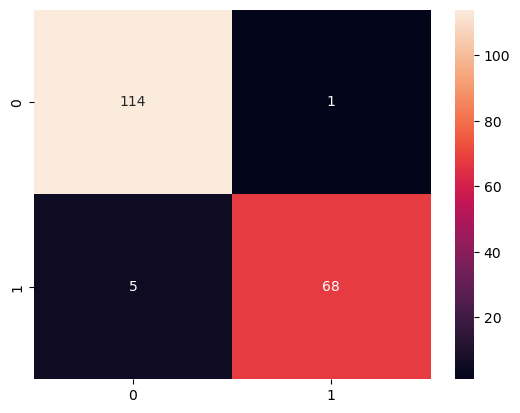


Confusion Matrix for 'KNeighborsClassifier'



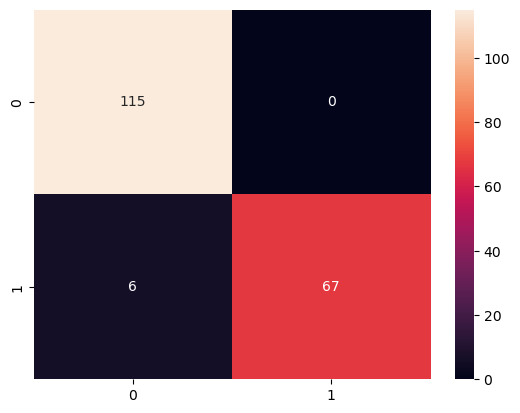


Confusion Matrix for 'GradientBoostingClassifier'



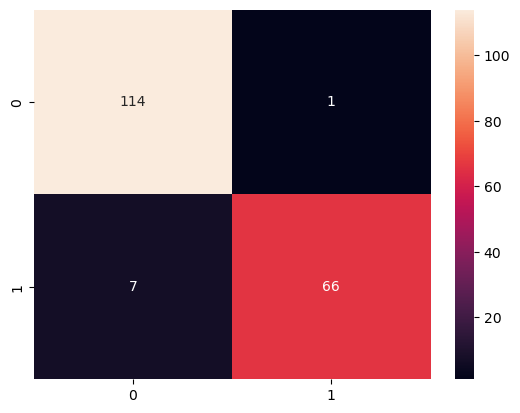

In [13]:
# Classification Report for Entire Dataset

X = data.drop(columns='diagnosis')
y = data.diagnosis
print(data.shape,X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
for name, cm in zip(models_list.keys(), confusion_matrixs):
    print(f"\nConfusion Matrix for '{name}'\n")
    cm_metrix_graph(cm)


Selected 10 Features:

radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           B       0.92      0.99      0.95       115
           M       0.98      0.86      0.92        73

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           B       0.93      0.98      0.96       115
           M       0.97      0.89      0.93        73

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



Classification Report of 'DecisionTreeClassifier '

              pr

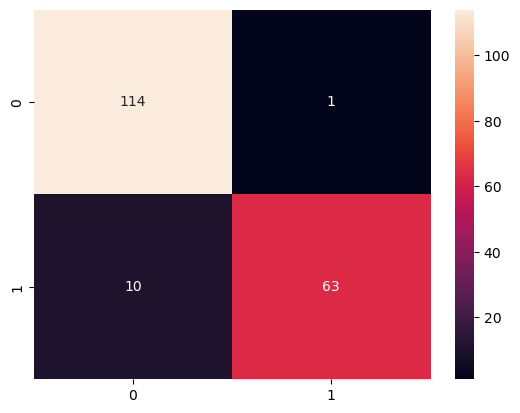


Confusion Matrix for 'RandomForestClassifier'



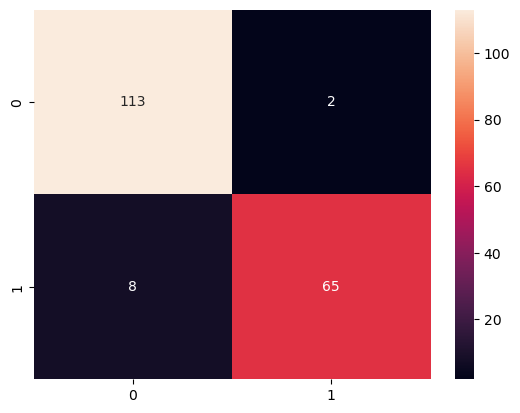


Confusion Matrix for 'DecisionTreeClassifier'



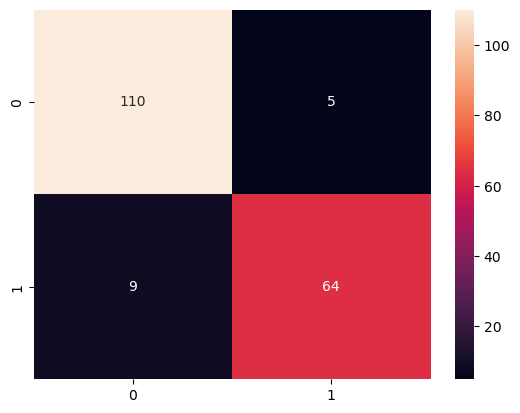


Confusion Matrix for 'SVC'



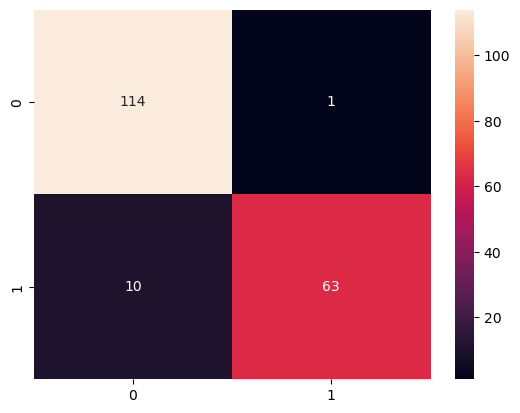


Confusion Matrix for 'KNeighborsClassifier'



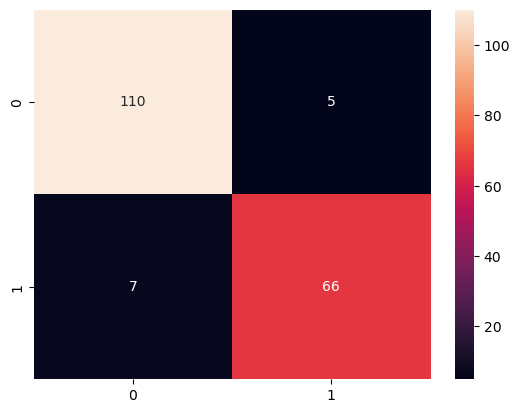


Confusion Matrix for 'GradientBoostingClassifier'



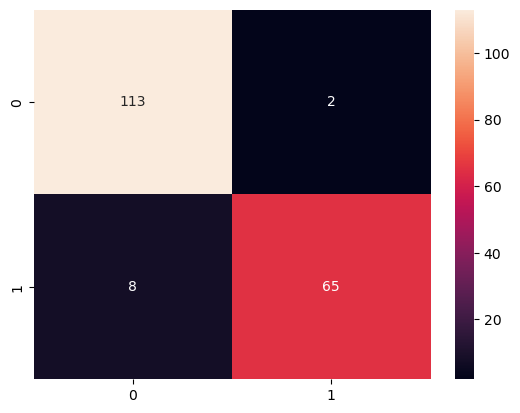

In [14]:
# Feature Selection

#ANOVA F-Test for 10 Features (Univariate Selection)
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop(columns='diagnosis')
y = data.diagnosis

anova_features = SelectKBest(score_func=f_classif, k=10)
X_anova=anova_features.fit_transform(X, y)

anova_indices = anova_features.get_support(indices=True)
anova_feature_names = X.columns[anova_indices]

print('Selected 10 Features:\n')
for f in anova_feature_names:
    print(f)

X_train, X_test, y_train, y_test = train_test_split(X_anova, y, test_size=0.33, random_state=15)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
for name, cm in zip(models_list.keys(), confusion_matrixs):
    print(f"\nConfusion Matrix for '{name}'\n")
    cm_metrix_graph(cm)



LogisticRegression:

Optimal Number of Features:  17
Features:  'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'
Accuracy:  0.9525694767893185

RandomForestClassifier:

Optimal Number of Features:  19
Features:  'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'
Accuracy:  0.9666200900481291

DecisionTreeClassifier:

Optimal Number of Features:  16
Features:  'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'rad

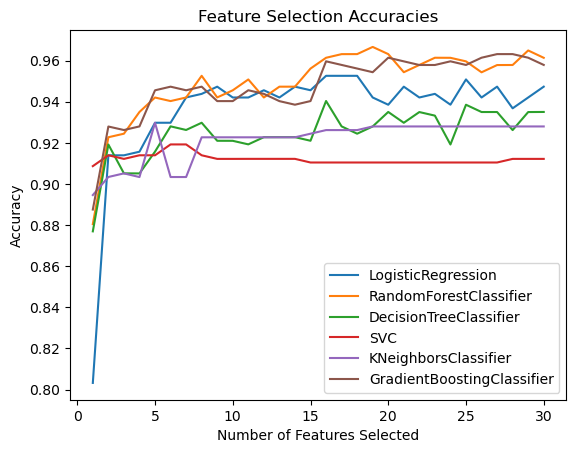

In [15]:
# Finding optimal features for the models (ANOVA Test)

import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

def optimalFeatures(X, y, test_name):
    plt.title('Feature Selection Accuracies')
    plt.xlabel('Number of Features Selected')
    plt.ylabel('Accuracy')

    for key, model in models_list.items():
        output = []
        feat = []
        for x in range(1,31):
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            features = SelectKBest(score_func=test_name, k=x)
            X_new=features.fit_transform(X, y)
            indices = features.get_support(indices=True)
            feature_names = X.columns[indices]
            feat.append(feature_names)
            acc_val = cross_val_score(model, X_new, y, cv=5).mean()
            output.append(acc_val)

        plt.plot(range(1, 31), output, label=key)
        opt_feat_num = np.argmax(output) + 1
        opt_acc = max(output)
        feat_index = opt_feat_num - 1
        print(f'\n{key}:\n')
        print('Optimal Number of Features: ',opt_feat_num)
        print('Features: ',', '.join(f"'{name}'" for name in feat[feat_index]))
        print('Accuracy: ',opt_acc)

    plt.legend()
    plt.show()

optimalFeatures(X, y, f_classif)

Selected 10 Features:

radius_mean
texture_mean
perimeter_mean
area_mean
perimeter_se
area_se
radius_worst
texture_worst
perimeter_worst
area_worst


Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           B       0.92      0.96      0.94       115
           M       0.93      0.86      0.89        73

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           B       0.90      0.98      0.94       115
           M       0.97      0.82      0.89        73

    accuracy                           0.92       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-sc

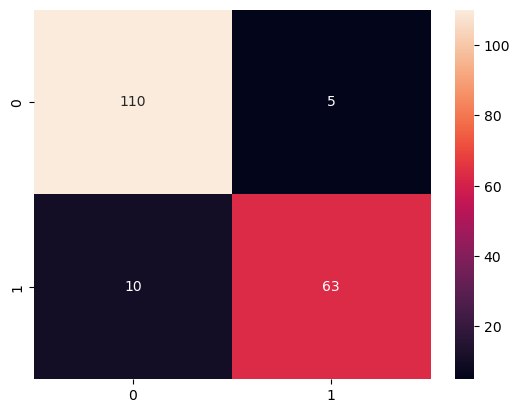


Confusion Matrix for 'RandomForestClassifier'



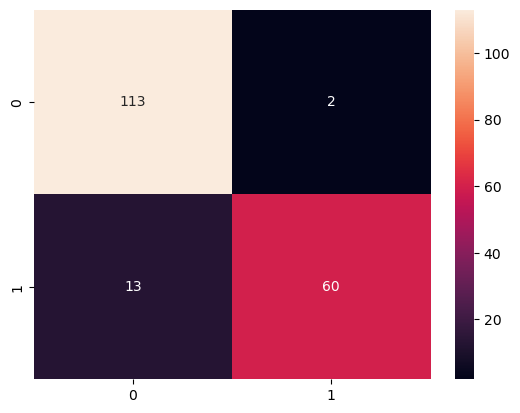


Confusion Matrix for 'DecisionTreeClassifier'



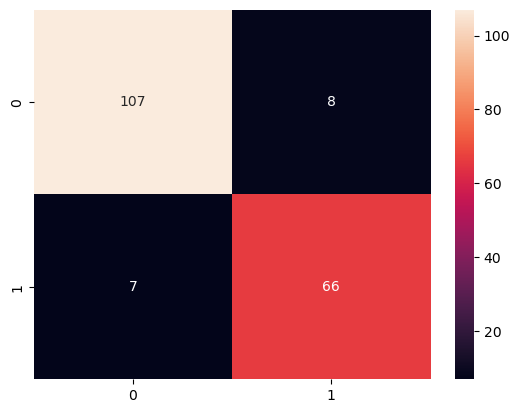


Confusion Matrix for 'SVC'



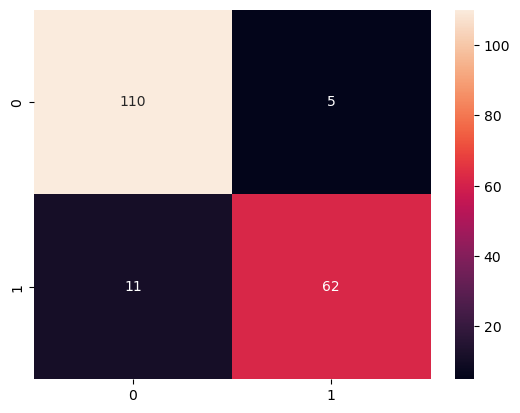


Confusion Matrix for 'KNeighborsClassifier'



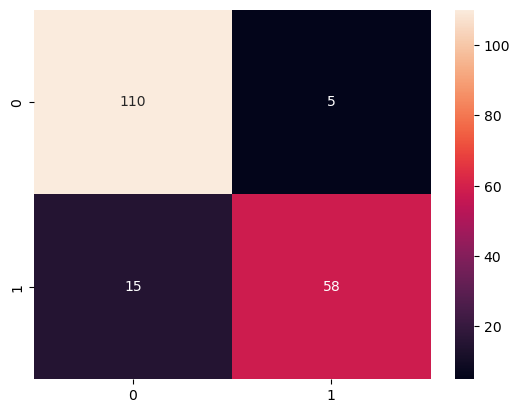


Confusion Matrix for 'GradientBoostingClassifier'



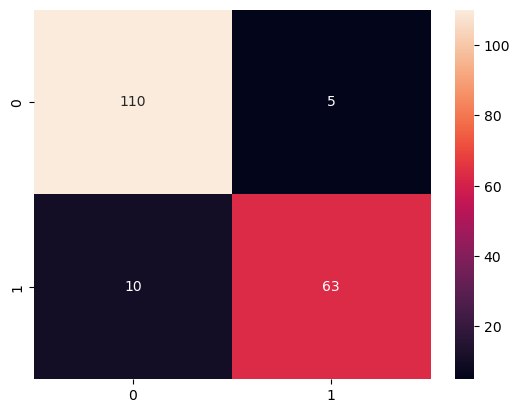

In [16]:
# Feature Selection

#Chi-Squared Test (Univariate Selection)
from sklearn.feature_selection import SelectKBest, chi2

X = data.drop(columns='diagnosis')
y = data.diagnosis

chi2_features = SelectKBest(score_func=chi2, k=10)
X_chi2=chi2_features.fit_transform(X, y)

chi2_indices = chi2_features.get_support(indices=True)
chi2_feature_names = X.columns[chi2_indices]

print('Selected 10 Features:\n')
for f in chi2_feature_names:
    print(f)

X_train, X_test, y_train, y_test = train_test_split(X_chi2, y, test_size=0.33, random_state=15)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
for name, cm in zip(models_list.keys(), confusion_matrixs):
    print(f"\nConfusion Matrix for '{name}'\n")
    cm_metrix_graph(cm)



LogisticRegression:

Optimal Number of Features:  25
Features:  'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
Accuracy:  0.9508150908244062

RandomForestClassifier:

Optimal Number of Features:  15
Features:  'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'
Accuracy:  0.9648812296227295

DecisionTreeClassifier:

Optimal Number of Features:  18
Features:  'radius_mean', 'texture_mean', 'perimete

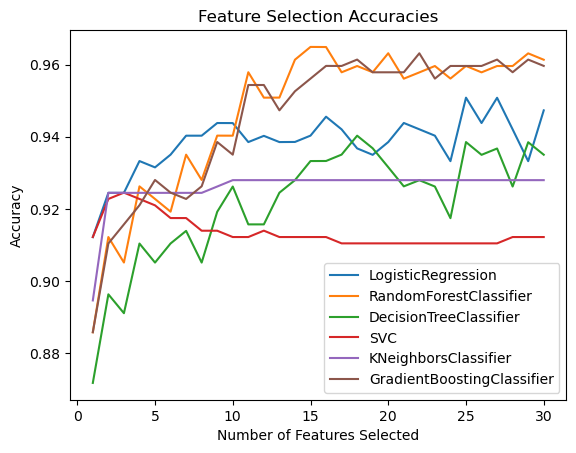

In [17]:
# Finding optimal features for the models (Chi-Squared Test)

optimalFeatures(X, y, chi2)


RandomForestClassifier

Optimal Number of Features:  8
Features:  'radius_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'symmetry_worst'
Accuracy:  0.9718987734823784

DecisionTreeClassifier

Optimal Number of Features:  9
Features:  'area_se', 'smoothness_se', 'compactness_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concave points_worst', 'symmetry_worst'
Accuracy:  0.9472442167365316

GradientBoostingClassifier

Optimal Number of Features:  10
Features:  'texture_mean', 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst'
Accuracy:  0.9631113181183046


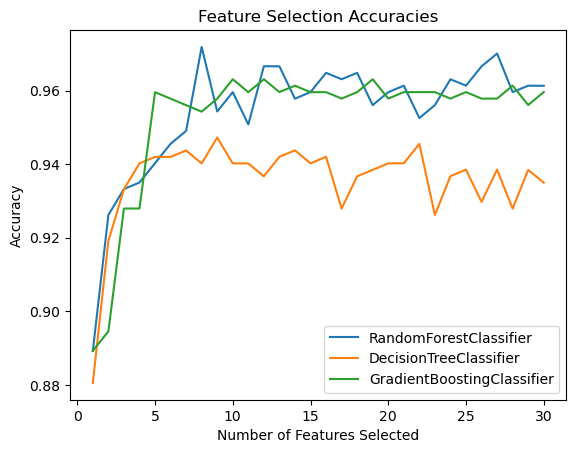

In [18]:
# RFE for tree models
from sklearn.feature_selection import RFE
import numpy as np

X = data.drop(columns='diagnosis')
y = data.diagnosis

tree_models = {}

for key, model in models_list.items():
    if key == "RandomForestClassifier":
        tree_models[key] = model
    if key == "DecisionTreeClassifier":
        tree_models[key] = model
    if key == "GradientBoostingClassifier":
        tree_models[key] = model

plt.title('Feature Selection Accuracies')
plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')

for key, model in tree_models.items():
    rfe_output = []
    feat = []
    for x in range(1,31):
        rfe_feat = RFE(model, n_features_to_select=x)
        X_rfe = rfe_feat.fit_transform(X, y)
        indices = rfe_feat.get_support(indices=True)
        feature_names = X.columns[indices]
        feat.append(feature_names)
        acc_val = cross_val_score(model, X_rfe, y, cv=5).mean()
        rfe_output.append(acc_val)
        
    plt.plot(range(1, 31), rfe_output, label=key)
    opt_feat_num = np.argmax(rfe_output) + 1
    opt_acc = max(rfe_output)
    feat_index = opt_feat_num - 1
    print(f'\n{key}\n')
    print('Optimal Number of Features: ',opt_feat_num)
    print('Features: ',', '.join(f"'{name}'" for name in feat[feat_index]))
    print('Accuracy: ',opt_acc)
    
plt.legend()
plt.show()


# Regularization for Linear Models



Classification Report of 'LassoLogisticRegression '

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       115
           M       1.00      0.90      0.95        73

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



Classification Report of 'RidgeLogisticRegression '

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       115
           M       1.00      0.92      0.96        73

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



Classification Report of 'LassoSVC '

              precision    recall  f1-score   support

           B       0.94      0.97      0.96       115
           M       0.96      0.90      0.93        73

    accuracy                    

/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


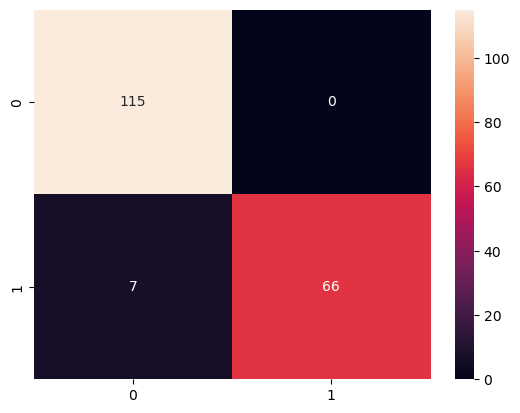


Confusion Matrix for 'RandomForestClassifier'



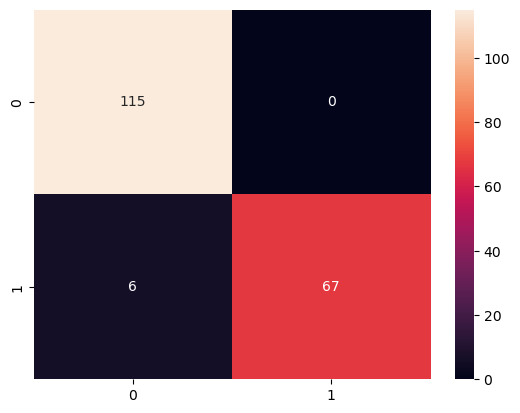


Confusion Matrix for 'DecisionTreeClassifier'



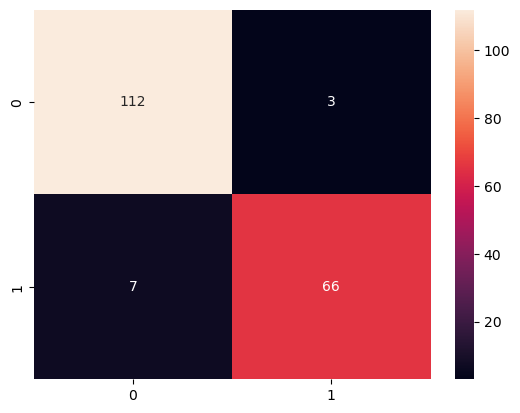


Confusion Matrix for 'SVC'



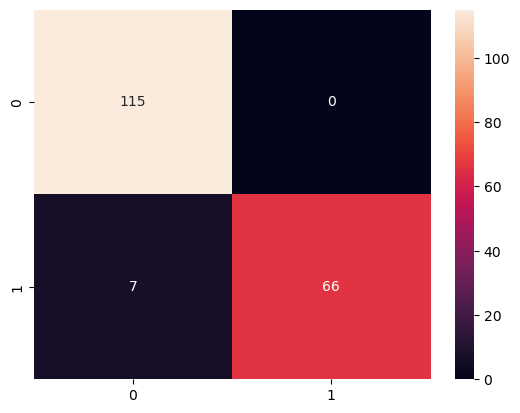

In [19]:
from sklearn.svm import LinearSVC

X = data.drop(columns='diagnosis')
y = data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

mlist = {
    'LassoLogisticRegression': LogisticRegression(penalty='l1', solver='liblinear'),
    'RidgeLogisticRegression': LogisticRegression(penalty='l2', solver='lbfgs'),
    'LassoSVC': LinearSVC(penalty='l1', dual=False, C=1.0, random_state=15),
    'RidgeSVC': LinearSVC(penalty='l2', C=1.0, random_state=15)
}

df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for key, model in mlist.items():
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(key), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([key, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
for name, cm in zip(models_list.keys(), confusion_matrixs):
    print(f"\nConfusion Matrix for '{name}'\n")
    cm_metrix_graph(cm)


# HyperTunning the ML Model


In [20]:
from  sklearn.model_selection import GridSearchCV

In [21]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)
print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9448717948717948

 Best Estinator is 
DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5)

 Best Parametes are
{'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File 

In [22]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9710526315789474

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=6, weights='distance')

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}


In [23]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9842780026990553

 Best Estinator is 
SVC(C=1, kernel='linear')

 Best Parametes are
{'C': 1, 'kernel': 'linear'}


In [24]:
# Pick the model
model = RandomForestClassifier()


# Tunning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)



 Best Score is 
0.9658569500674762

 Best Estinator is 
RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=200)

 Best Parametes are
{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/bhakti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "